# Compute performance metrics for the given Y and Y_score without sklearn

In [ ]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [1]:


from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5_a.csv")
#file1.head(10)

Confusion Matrix : ([10000, 100], [0, 0])
F1 Score : 0.9950248756218906
Auccuracy Score: 0.9900990099009901
Auc score 0.48755149999999997


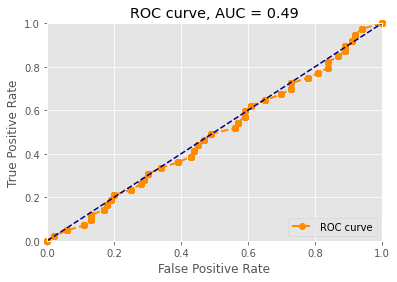

In [10]:

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,9)
%matplotlib inline
file1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5_a.csv")
file1=file1.sort_values( by= ["proba"], ascending = False)
A=file1['proba'].tolist()
C=file1['y'].tolist()
def performance(A,C,T):
 B=[]
 for i in range(0,len(A)):
  if A[i]<T:
    B.append(0)
  else:
    B.append(1) 
 tp=0  # counters for 4 of them
 fp=0
 fn=0
 tn=0
 for i in range(0,len(B)):
   if C[i]==B[i]:
      if B[i]==0:
        tn=tn+1
      else:
        tp=tp+1  
   else:
      if B[i]==0:
        fn=fn+1
      else:
        fp=fp+1 
 return tp,fp,fn,tn

tp,fp,fn,tn=performance(A,C,0.5)

CM=([tp,fp],[fn,tn]) #cconfusion matrix remeber to give ,for matrix

print('Confusion Matrix :',CM)

pr=tp/(tp+fp)
re=tp/(tp+fn)
F1=(2*pr*re)/(pr+re)
print('F1 Score :',F1)
AUC=(tn+tp)/(tp+fp+fn+tn)
print('Auccuracy Score:',AUC)
insert=set(A)
unique_list=(list(insert))




score = A
y =C

# false positive rate
FPR = []
# true positive rate
TPR = []
# Iterate thresholds from 0.0 to 1.0
thresholds = sorted(unique_list)

# get number of positive and negative examples in the dataset
P = sum(y)
N = len(y) - P

for thresh in thresholds:   # we cant use above performance function because we need predicted value in same as it is 0.5,6... but there it converted in to 0,1
    FP=0
    TP=0
    thresh = round(thresh,2) #Limiting floats to two decimal points, or threshold 0.6 will be 0.6000000000000001 which gives FP=0
    for i in range(len(score)):
        if (score[i] >= thresh):
            if y[i] == 1:
                TP = TP + 1
            if y[i] == 0:
                FP = FP + 1
    FPR.append(FP/N)
    TPR.append(TP/P)

 
auc =np.trapz(sorted(TPR),sorted(FPR))  # finding the intefration from right to left so we need to sort here
print("Auc score",auc) 
plt.plot(FPR, TPR, linestyle='--', marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(loc="lower right")
plt.savefig('AUC_example.png')
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [11]:
import numpy as np
import pandas as pd
file2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5_b.csv")

In [12]:
A=file2['proba'].tolist()
C=file2['y'].tolist()
def performance(A,C,T):
 B=[]
 for i in range(0,len(A)):
  if A[i]<T:
    B.append(0)
  else:
    B.append(1) 
 tp=0  # counters for 4 of them
 fp=0
 fn=0
 tn=0
 for i in range(0,len(B)):
   if C[i]==B[i]:
      if B[i]==0:
        tn=tn+1
      else:
        tp=tp+1  
   else:
      if B[i]==0:
        fn=fn+1
      else:
        fp=fp+1 
 return tp,fp,fn,tn

tp,fp,fn,tn=performance(A,C,0.5)

CM=([tp,fp],[fn,tn]) #cconfusion matrix remeber to give ,for matrix

print('Confusion Matrix :',CM)

pr=tp/(tp+fp)
re=tp/(tp+fn)
F1=2*pr*re/(pr+re)
print('F1 Score :',F1)
AUC=(tn+tp)/(tp+fp+fn+tn)
print('Auccuracy Score:',AUC)
insert=set(A)
unique_list=(list(insert))

score = A
y =C

# false positive rate
FPR = []
# true positive rate
TPR = []
# Iterate thresholds from 0.0 to 1.0
thresholds = sorted(unique_list)

# get number of positive and negative examples in the dataset
P = sum(y)
N = len(y) - P

for thresh in thresholds:   # we cant use above performance function because we need predicted value in same as it is 0.5,6... but there it converted in to 0,1
    FP=0
    TP=0
    thresh = round(thresh,2) #Limiting floats to two decimal points, or threshold 0.6 will be 0.6000000000000001 which gives FP=0
    for i in range(len(score)):
        if (score[i] >= thresh):
            if y[i] == 1:
                TP = TP + 1
            if y[i] == 0:
                FP = FP + 1
    FPR.append(FP/N)
    TPR.append(TP/P)

#you're integrating from right to left. This flips the sign of the result 
 
auc =np.trapz(sorted(TPR),sorted(FPR))  # finding the intefration from right to left so we need to sort here
print("Auc score",auc) 

Confusion Matrix : ([55, 239], [45, 9761])
F1 Score : 0.2791878172588833
Auccuracy Score: 0.9718811881188119
Auc score 0.937285


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
import numpy as np
import pandas as pd
file3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5_c.csv")
file3.head(3)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652


In [ ]:
A=file3['prob'].tolist()
C=file3['y'].tolist()
def performance(A,C,T):
 B=[]
 for i in range(0,len(A)-1):
  if A[i]<T:
    B.append(0)
  else:
    B.append(1) 
 tp=0  # counters for 4 of them
 fp=0
 fn=0
 tn=0
 for i in range(0,len(B)-1):
   if C[i]==B[i]:
      if B[i]==0:
        tn=tn+1
      else:
        tp=tp+1  
   else:
      if B[i]==0:
        fn=fn+1
      else:
        fp=fp+1 
 return tp,fp,fn,tn

tp,fp,fn,tn=performance(A,C,0.5)

S=[]
for i in range(0,len(A)-1): 
 a,b,c,d=performance(A,C,unique_list[i]) # taking each 
 T=500*c+100*b
 S.append(T)

print(S)
x=S[0]
x1=0
for i in range(1,len(A)-1):
   if x>S[i]:
     x=S[i]
     x1=i
   

print("lowest thresold value from unique list")
print(unique_list[x1])




[189000, 190000, 177800, 158400, 150600, 156700, 207700, 152900, 175000, 156700, 146500, 168300, 157800, 164400, 207200, 162700, 225600, 145300, 151000, 160500, 156800, 143900, 141800, 152600, 142700, 151000, 145700, 151700, 237000, 164300, 175600, 162700, 154000, 145500, 158000, 177100, 142600, 151400, 164600, 149400, 149600, 147600, 193300, 147900, 156800, 154300, 147300, 248100, 164200, 156900, 142800, 147600, 142900, 147800, 162100, 142200, 142600, 155800, 149800, 155500, 149100, 144300, 245300, 243300, 211900, 164300, 167800, 198600, 186100, 150400, 161200, 141700, 165500, 172900, 246500, 250300, 152800, 157100, 155900, 152200, 163900, 182600, 250300, 214100, 146100, 208000, 187700, 169200, 149600, 164900, 142100, 166500, 146000, 143100, 192600, 162700, 202300, 184400, 164400, 164400, 161200, 224400, 149200, 173400, 146600, 203200, 152200, 190100, 141700, 145400, 213900, 181900, 212700, 172100, 202800, 151600, 149900, 148600, 152400, 142000, 142300, 159400, 216800, 143300, 142100,

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
import numpy as np
import pandas as pd
file4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/5_d.csv")
file4.head(3)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0


In [ ]:
A = file4['pred'].tolist()
C = file4['y'].tolist()
B = []
Csum = 0
x = 0
y = 0

for i in range(0, len(A)):
    if A[i] < 0.5:
        B.append(0)
    else:
        B.append(1)
    Csum = Csum + C[i]

y_bar = Csum/len(C)
for i in range(0, len(B)):
    y = y + ((C[i] - A[i]) ** 2)
    x=x+((C[i]-y_bar)**2)

print('Compute Mean Square Error')
print(y / len(A))

print('Compute MAPE')
Error = np.sum(np.abs(np.subtract(C,A)))
Average = np.sum(C)
MAPE = Error/Average
print(MAPE)
print('Compute R^2 error:')
print( 1 - (y/x))

Compute Mean Square Error
177.16569974554707
Compute MAPE
0.1291202994009687
Compute R^2 error:
0.9563582786990964
